In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sb
from wordcloud import WordCloud
import itertools
import astropy.coordinates as coord
from astropy.io import ascii
import astropy.units as u

%matplotlib inline
plt.style.use('ggplot')

In [2]:
exos = pd.read_csv('data/PSCompPars_2021.07.12_12.50.05.csv')

In [3]:
exos.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,326.03000,0.32,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,185.84000,0.23,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1773.40002,2.50,...,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00,...,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


In [4]:
len(exos)

4434

In [5]:
exos_relevant = exos[['pl_name','hostname','sy_snum','sy_pnum','discoverymethod','disc_year','disc_facility','pl_controv_flag',
                      'pl_rade','pl_bmasse','pl_bmassprov','pl_eqt','st_spectype','st_teff','st_mass','st_rad','ra','dec','glon','glat','sy_dist']]

In [6]:
exos_relevant.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_rade,pl_bmasse,...,pl_eqt,st_spectype,st_teff,st_mass,st_rad,ra,dec,glon,glat,sy_dist
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,12.1,6165.6000,...,NaN,G8 III,4742.0,2.70,19.00,185.178779,17.793252,264.13775,78.28058,93.1846
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,12.3,4684.8142,...,NaN,K4 III,4213.0,2.78,29.79,229.274595,71.823943,108.71900,41.04437,125.321
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,12.9,1525.5000,...,NaN,K0 III,4813.0,2.20,11.00,352.824150,39.235837,106.41269,-21.05141,75.4392
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,12.9,1481.0878,...,NaN,K0 V,5338.0,0.90,0.93,242.602101,43.816362,69.16849,46.94447,17.9323
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,13.5,565.7374,...,NaN,G3 V,5750.0,1.08,1.13,295.465642,50.516824,83.33558,13.20446,21.1397


In [7]:
exos_mle_mass = exos_relevant[['pl_name','pl_bmasse','pl_bmassprov']]
exos_mle_temp = exos_relevant[['pl_name','pl_eqt', 'pl_bmasse']]
exos_mle_size = exos_relevant[['pl_name','pl_rade', 'pl_bmasse']]
exos_mle_dist = exos_relevant[['pl_name','hostname','ra','dec','sy_dist','pl_bmasse']]

rocky_max = exos_relevant[(exos_relevant['pl_bmasse'] > 10)].index
rocky_planets = exos_relevant.drop(rocky_max, inplace = False) #nasa scientists say this is the approximate limit for rocky planets
len(rocky_planets)

2422

In [8]:
#let's look at the distribution of exoplanet masses...
exos_mle_mass.head()

,pl_name,pl_bmasse,pl_bmassprov
0,11 Com b,6165.6000,Msini
1,11 UMi b,4684.8142,Msini
2,14 And b,1525.5000,Msini
3,14 Her b,1481.0878,Msini
4,16 Cyg B b,565.7374,Msini


In [9]:
masses = exos_mle_mass['pl_bmasse']

(masses.min(), masses.max())

(0.02, 239000.0)

In [10]:
#fig, ax = plt.subplots()
#ax.hist(masses)

In [11]:
#not helpful...

#masses_under_50k = masses[masses<50000]
#(masses_under_50k.min(),masses_under_50000.max())

In [12]:
#fig, ax = plt.subplots()
#ax.hist(masses_under_50k)

In [13]:
#still not helpful!

#masses_under_10k = masses[masses<10000]

#fig, ax = plt.subplots()
#ax.hist(masses_under_10k)

In [14]:
#len(masses_under_10k)

In [15]:
#wow!! still reducing...

#masses_under_2k = masses[masses<2000]

#fig, ax = plt.subplots()
#ax.hist(masses_under_2k)

In [16]:
#len(masses_under_2k)

In [17]:
#masses_upto_jupiter = masses[masses<317.8] #Jupiter is 317.8 times as massive as the Earth

In [18]:
#fig, ax = plt.subplots()
#ax.hist(masses_upto_jupiter)

In [19]:
too_massive = exos_mle_mass[(exos_mle_mass['pl_bmasse'] > 10)].index
masses_terrestrial = masses.drop(too_massive, inplace = False) #nasa scientists say this is the approximate limit for rocky planets
rocky_masses = masses_terrestrial.to_frame()

#rocky_masses.head(50)

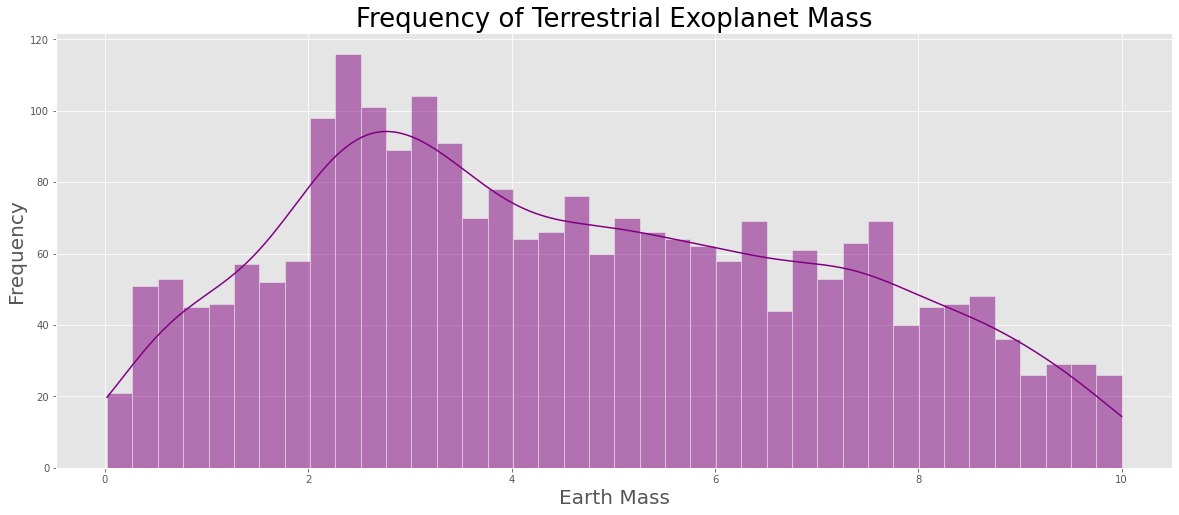

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sb.histplot(data=rocky_masses, x='pl_bmasse', bins = 40, color = 'purple', kde=True)

#specfiy axis labels
ax.set_xlabel(xlabel='Earth Mass', fontsize = 20)
ax.set_ylabel(ylabel='Frequency',fontsize = 20)
ax.set_title(label='Frequency of Terrestrial Exoplanet Mass', fontsize=26)

#plt.savefig('images/rocky_mass_hist.png')

In [21]:
#the masses of exoplanets appear to be (approximately) normally distributed if we are only looking 
#within the threshold of what nasa considers to be "terrestrial" planets

In [22]:
mu_masses = np.mean(rocky_masses['pl_bmasse'])
std_masses = np.std(rocky_masses['pl_bmasse'])

(mu_masses, std_masses)

(4.580693166666665, 2.5310658609432184)

In [23]:
rocky_masses.head()

,pl_bmasse
29,7.99000
32,5.10000
59,8.50000
89,5.70000
102,4.07661


In [24]:
def log_likelihood_normal(loc, scale, data):
    '''
    Calculates the log likelihood of the data given that it is normally distributed.
    
    Parameters:
    mu: the average value of the sample
    data: the observed data
    
    Returns:
    float: the log likelihood of the data given the distribution'''
    
    #instantiate a normal distribution with the mu specified in the call:
    norm = stats.norm(loc, scale)
    
    #find the likelihoods of all data points using the pmf (numpy ndarray):
    likelies = [norm.pdf(datum) for datum in data]
    
    #find the log of the likelihoods:
    log_likelies = np.log(likelies)
    
    #sum up the log likelihoods and return the total:
    return np.sum(log_likelies)

In [25]:
log_likelihood_normal(data=rocky_masses['pl_bmasse'], loc=mu_masses, scale=std_masses)

nan

In [26]:
#how do i proceed with MLE? what parameters am i fixing and what am i estimating? do i have a normal distribution? a step-by-step list of the 
#process would be really helpful

In [27]:
rocky_distance = rocky_planets.copy()
len(rocky_distance)

2422

In [28]:
rocky_distance.iloc[2358]

pl_name            OGLE-2018-BLG-0677L b
hostname             OGLE-2018-BLG-0677L
sy_snum                                1
sy_pnum                                1
discoverymethod             Microlensing
disc_year                           2020
disc_facility                       OGLE
pl_controv_flag                        0
pl_rade                             1.82
pl_bmasse                           3.96
pl_bmassprov                        Mass
pl_eqt                               NaN
st_spectype                          NaN
st_teff                              NaN
st_mass                             0.12
st_rad                               NaN
ra                               268.751
dec                             -32.0165
glon                             358.389
glat                            -3.31375
sy_dist                n et al. 2020</a>
Name: 4030, dtype: object

In [29]:
rocky_distance['sy_dist'] = rocky_distance['sy_dist'].apply(pd.to_numeric, errors='coerce')
rocky_distance['sy_dist'].dropna()

29       12.58550
32        8.50332
59       20.26950
89      591.55500
102     159.90600
          ...    
4420     18.27020
4425      3.60304
4426      3.60304
4427      3.60304
4428      3.60304
Name: sy_dist, Length: 2421, dtype: float64

In [30]:
'''fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sb.boxplot(data=rocky_distance)

#specfiy axis labels
ax.set_xlabel(xlabel='Earth Mass', fontsize = 20)
ax.set_ylabel(ylabel='Frequency',fontsize = 20)
ax.set_title(label='Frequency of Terrestrial Exoplanet Mass', fontsize=26)'''

"fig, ax = plt.subplots()\nfig.set_size_inches(20,8)\nsb.boxplot(data=rocky_distance)\n\n#specfiy axis labels\nax.set_xlabel(xlabel='Earth Mass', fontsize = 20)\nax.set_ylabel(ylabel='Frequency',fontsize = 20)\nax.set_title(label='Frequency of Terrestrial Exoplanet Mass', fontsize=26)"

In [31]:
masses_terrestrial.head()

29     7.99000
32     5.10000
59     8.50000
89     5.70000
102    4.07661
Name: pl_bmasse, dtype: float64

In [32]:
mass_bins = list(range(11))
mass_labels = list(range(10))

rocky_masses['binned'] = pd.cut(rocky_masses['pl_bmasse'], mass_bins, labels = mass_labels, include_lowest = True)
rocky_masses['binned'].value_counts()

2    402
3    340
4    271
5    262
6    232
7    225
1    223
8    175
0    160
9    110
Name: binned, dtype: int64

In [33]:
exos_relevant.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_rade,pl_bmasse,...,pl_eqt,st_spectype,st_teff,st_mass,st_rad,ra,dec,glon,glat,sy_dist
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,12.1,6165.6000,...,NaN,G8 III,4742.0,2.70,19.00,185.178779,17.793252,264.13775,78.28058,93.1846
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,12.3,4684.8142,...,NaN,K4 III,4213.0,2.78,29.79,229.274595,71.823943,108.71900,41.04437,125.321
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,12.9,1525.5000,...,NaN,K0 III,4813.0,2.20,11.00,352.824150,39.235837,106.41269,-21.05141,75.4392
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,12.9,1481.0878,...,NaN,K0 V,5338.0,0.90,0.93,242.602101,43.816362,69.16849,46.94447,17.9323
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,13.5,565.7374,...,NaN,G3 V,5750.0,1.08,1.13,295.465642,50.516824,83.33558,13.20446,21.1397


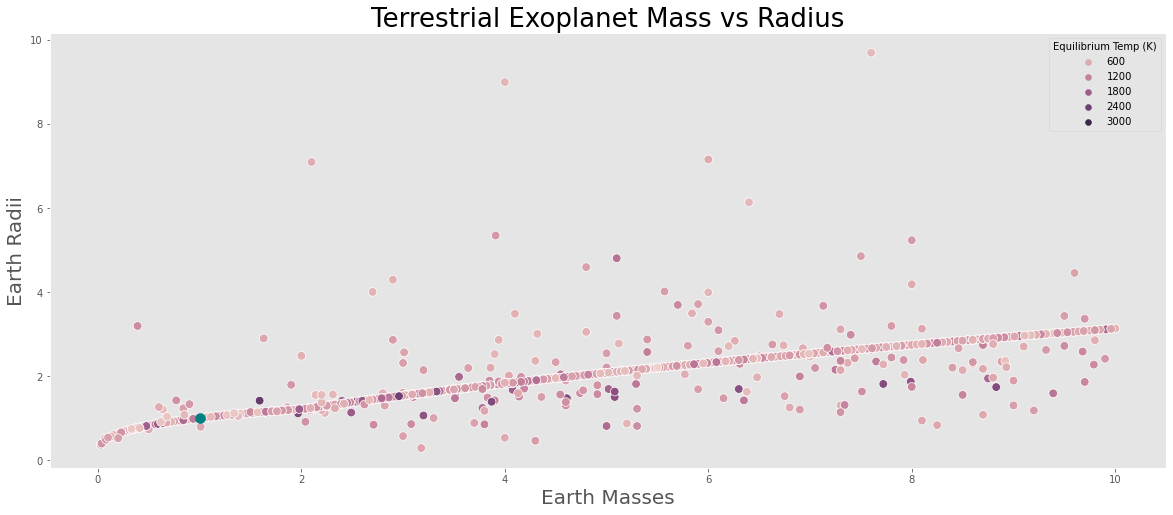

In [42]:
fig=plt.gcf()
fig.set_size_inches(20,8)

ax = sb.scatterplot(x="pl_bmasse",
                    y="pl_rade",
                    data=rocky_planets,
                    hue='pl_eqt',
                    s = 75,
                    legend = 'brief')

#specfiy axis labels
ax.set_xlabel(xlabel='Earth Masses', fontsize = 20)
ax.set_ylabel(ylabel='Earth Radii',fontsize = 20)
ax.set_title(label='Terrestrial Exoplanet Mass vs Radius', fontsize=26)
ax.grid(False)
ax.scatter(1,1, marker='o', s=100, c='teal')
ax.legend(title='Equilibrium Temp (K)')

#plt.savefig('images/rocky_mass_v_rad_scatter.png')

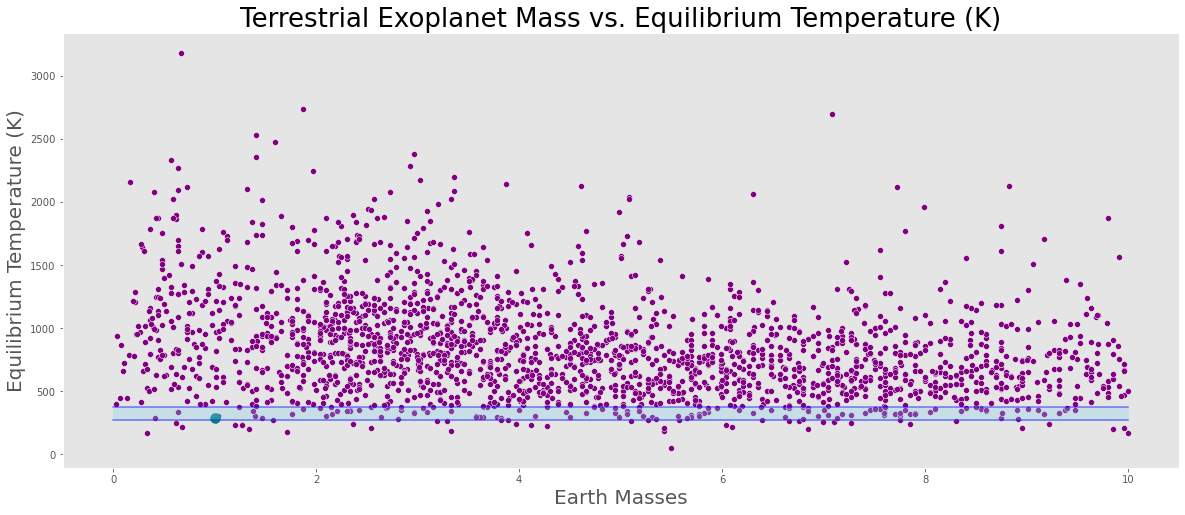

In [45]:
fig=plt.gcf()
fig.set_size_inches(20,8)

ax = sb.scatterplot(x="pl_bmasse",
                    y="pl_eqt",
                    data=rocky_planets,
                    color = 'purple')

#specfiy axis labels
ax.set_xlabel(xlabel='Earth Masses', fontsize = 20)
ax.set_ylabel(ylabel='Equilibrium Temperature (K)',fontsize = 20)
ax.set_title(label='Terrestrial Exoplanet Mass vs. Equilibrium Temperature (K)', fontsize=26)
ax.scatter(1,288, marker='o', s=100, c='teal')
ax.axhline(273.15,xmin=0.045,xmax=.955,alpha=0.5, color='blue')
ax.axhline(373.15,xmin=0.045,xmax=.955,alpha=0.5, color='blue')
ax.fill_between(x=np.arange(0,11),y1=273.15,y2=373.15,color='skyblue',alpha=0.3)
ax.grid(False)

#plt.savefig('images/rocky_mass_v_temp_scatter_watermarks.png')

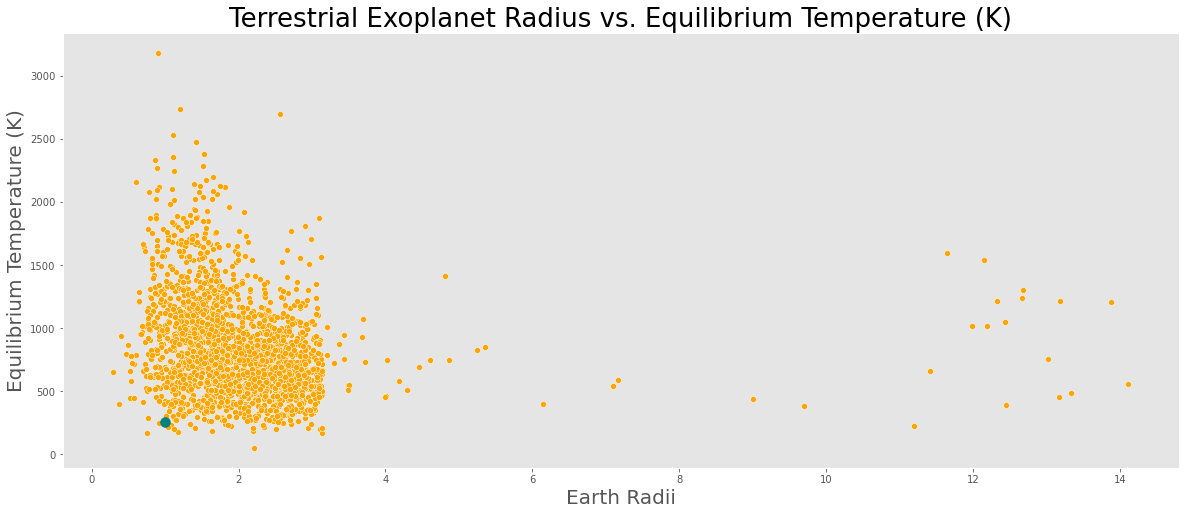

In [47]:
fig=plt.gcf()
fig.set_size_inches(20,8)

ax = sb.scatterplot(x="pl_rade",
                    y="pl_eqt",
                    data=rocky_planets,
                    color = 'orange')

#specfiy axis labels
ax.set_xlabel(xlabel='Earth Radii', fontsize = 20)
ax.set_ylabel(ylabel='Equilibrium Temperature (K)',fontsize = 20)
ax.set_title(label='Terrestrial Exoplanet Radius vs. Equilibrium Temperature (K)', fontsize=26)
ax.scatter(1,255, marker='o', s=100,c='teal')
ax.grid(False)

#plt.savefig('images/rocky_rad_v_temp_scatter.png')

In [48]:
def metric_scatterplot_maker(data):
    
    x_metric = input('Please enter the column name of the x-axis data:')
    y_metric = input('Please enter the column name of the y-axis data:')
    color_val = input('Please specify the color of the marker:').lower()
    
    fig=plt.gcf()
    fig.set_size_inches(20,8)

    ax = sb.scatterplot(x=data[x_metric],
                        y=data[y_metric],
                        data=data,
                        color = color_val)

    #specfiy axis labels
    ax.set_xlabel(xlabel=x_metric, fontsize = 20)
    ax.set_ylabel(ylabel=y_metric,fontsize = 20)
    ax.set_title(label=f'Terrestrial Exoplanet {x_metric} vs. {y_metric}', fontsize=26)
    #ax.scatter(1,255, marker='o', s=100)
    ax.grid(False)

In [49]:
#metric_scatterplot_maker(rocky_planets)

In [50]:
#metric_scatterplot_maker(rocky_planets)

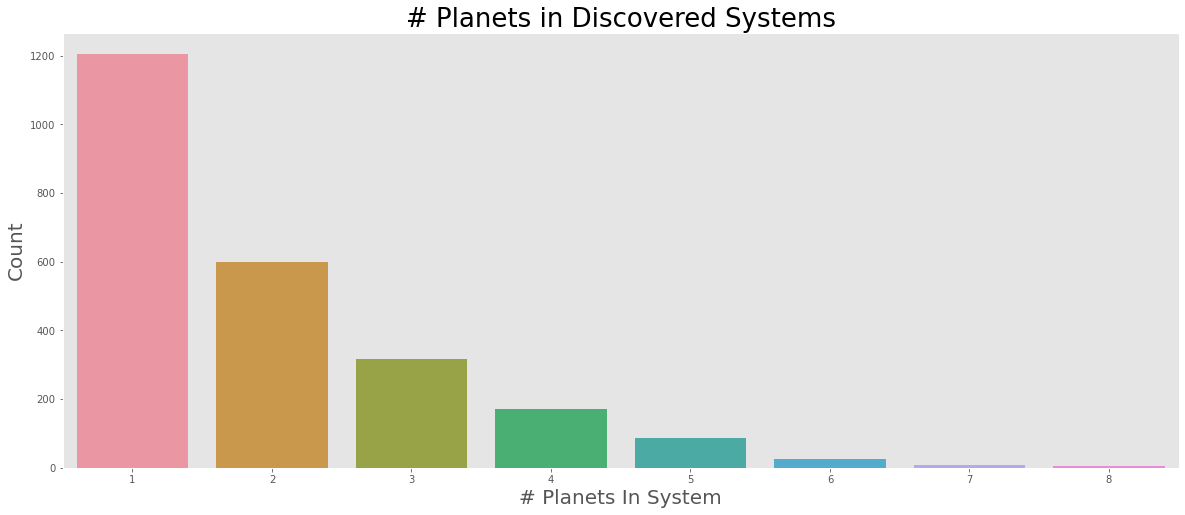

In [52]:
fig=plt.gcf()
fig.set_size_inches(20,8)

ax = sb.countplot(x = 'sy_pnum', data = rocky_planets)

#specfiy axis labels
ax.set_xlabel(xlabel='# Planets In System', fontsize = 20)
ax.set_ylabel(ylabel='Count',fontsize = 20)
ax.set_title(label='# Planets in Discovered Systems', fontsize=26)
ax.grid(False)

plt.savefig('images/num_planets_in_system.png') 

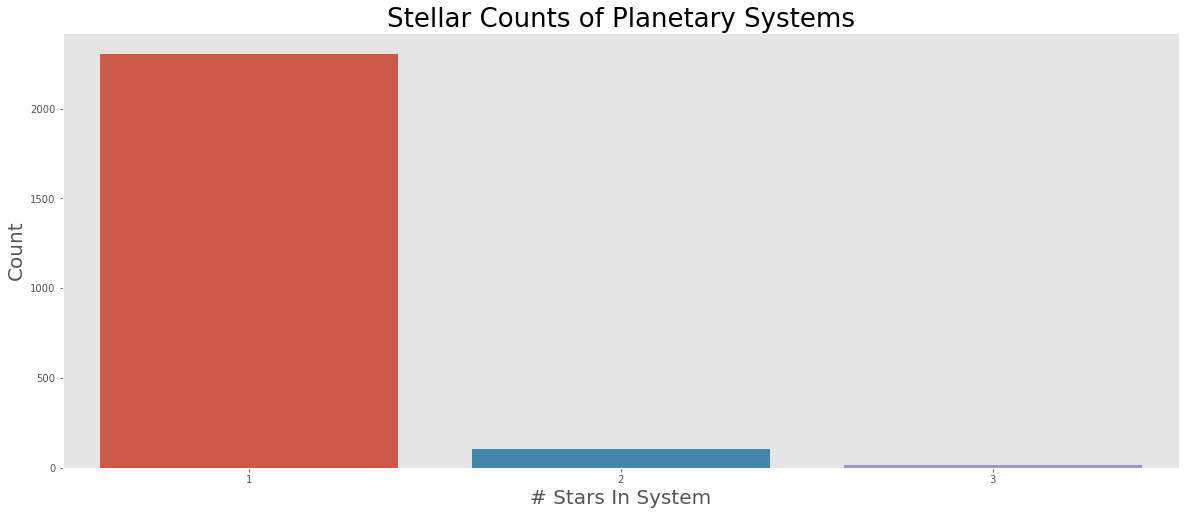

In [54]:
fig=plt.gcf()
fig.set_size_inches(20,8)

ax = sb.countplot(x = 'sy_snum', data = rocky_planets)

#specfiy axis labels
ax.set_xlabel(xlabel='# Stars In System', fontsize = 20)
ax.set_ylabel(ylabel='Count',fontsize = 20)
ax.set_title(label='Stellar Counts of Planetary Systems', fontsize=26)
ax.grid(False)

plt.savefig('images/num_stars_in_system.png')

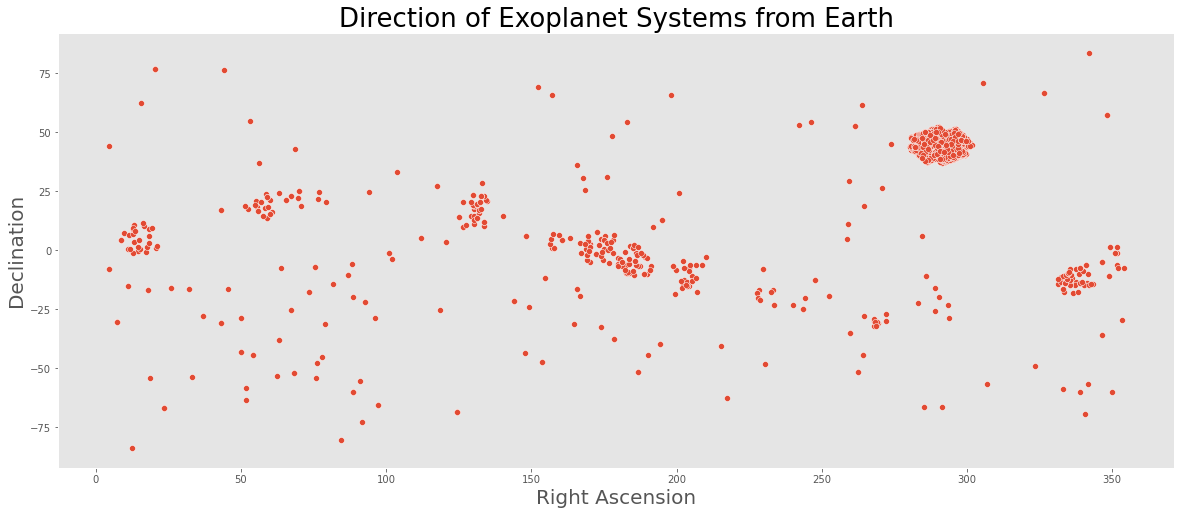

In [55]:
fig=plt.gcf()
fig.set_size_inches(20,8)

ax = sb.scatterplot(x = 'ra', y = 'dec', data = rocky_planets)

#specfiy axis labels
ax.set_xlabel(xlabel='Right Ascension', fontsize = 20)
ax.set_ylabel(ylabel='Declination',fontsize = 20)
ax.set_title(label='Direction of Exoplanet Systems from Earth', fontsize=26)
ax.grid(False)

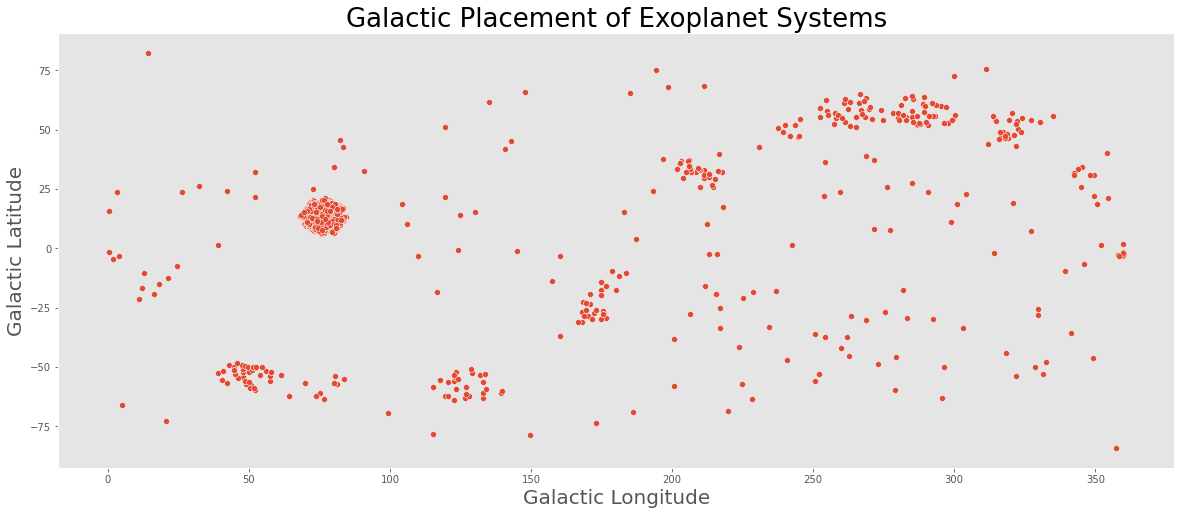

In [56]:
fig=plt.gcf()
fig.set_size_inches(20,8)

ax = sb.scatterplot(x = 'glon', y = 'glat', data = rocky_planets)

#specfiy axis labels
ax.set_xlabel(xlabel='Galactic Longitude', fontsize = 20)
ax.set_ylabel(ylabel='Galactic Latitude',fontsize = 20)
ax.set_title(label='Galactic Placement of Exoplanet Systems', fontsize=26)
ax.grid(False)

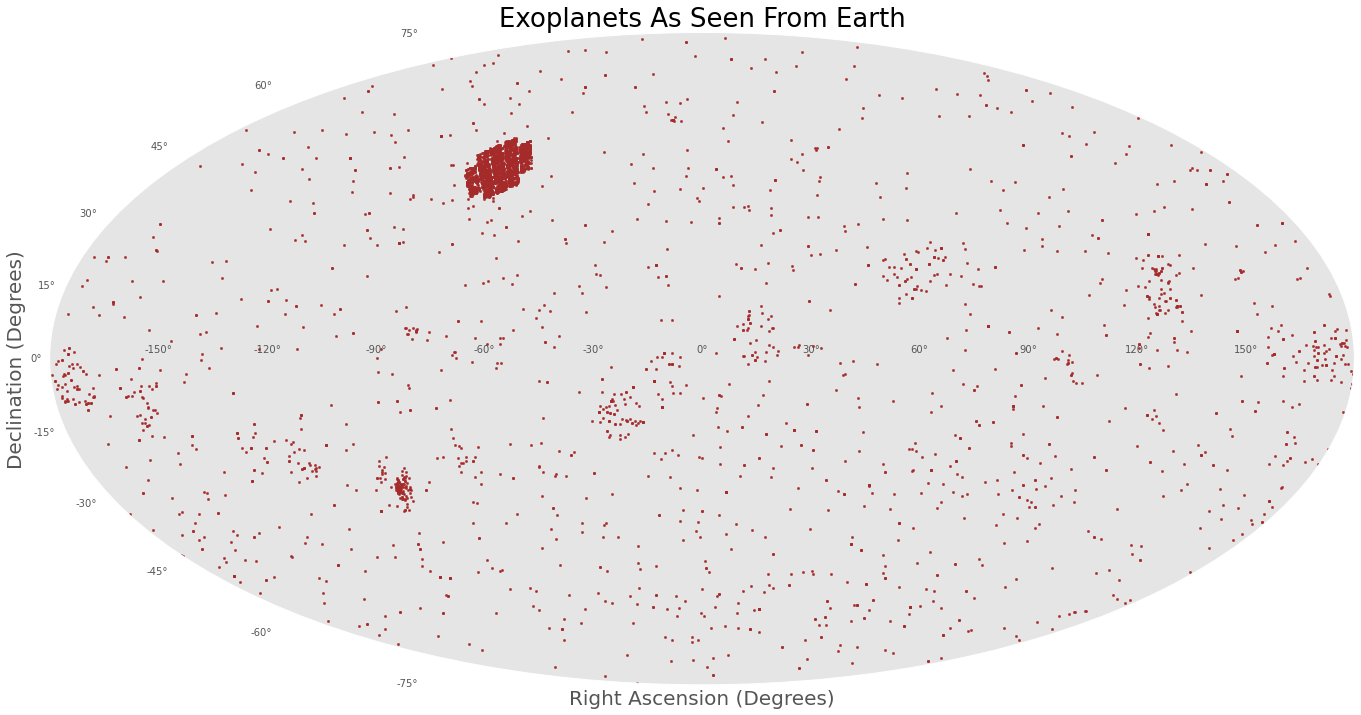

In [60]:
#let's mess with mapping out the systems galactically...

stars = ascii.read('data/PSCompPars_2021.07.12_12.50.05.csv')

ra = coord.Angle(stars['ra']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(stars['dec']*u.degree)

fig = plt.gcf()
fig.set_size_inches(30,12)

ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian, s=5, color='brown')
ax.set_xlabel(xlabel='Right Ascension (Degrees)', fontsize = 20)
ax.set_ylabel(ylabel='Declination (Degrees)',fontsize = 20)
ax.set_title(label='Exoplanets As Seen From Earth', fontsize=26)
ax.grid(False)

#plt.savefig('images/exos_in_space.png')

In [61]:
#coordinates for cygnus: ~20h RA, +42dec
#coordinates for sagittarius: ~18h RA, -30dec
#coordinates for aquarius: ~22:30 RA, -15dec
#coordinates for cancer: ~8:30RA, 15dec
#coordinates for virgo: ~12RA, 0dec

In [62]:
len(masses_terrestrial)

2422

In [63]:
terrestrial_planets = (len(masses_terrestrial)/len(masses))*100
terrestrial_planets

54.623364907532704

In [64]:
terrestrial_mass_mean = masses_terrestrial.mean()
terrestrial_mass_mean

4.580693166666665

In [65]:
terrestrial_mass_std = np.std(masses_terrestrial)

In [66]:
#alright, let's first look at planets with a maximum of 10 ME then, for radius, temp, and size comparisons...
exos_mle_temp.head()

exos_mle_temp_clean = exos_mle_temp.dropna(axis=0, inplace=False)

len(exos_mle_temp)

4434

(array([4.270e+02, 1.277e+03, 8.870e+02, 4.040e+02, 2.040e+02, 5.300e+01,
        2.100e+01, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  50.,  450.,  850., 1250., 1650., 2050., 2450., 2850., 3250.,
        3650., 4050.]),
 <BarContainer object of 10 artists>)

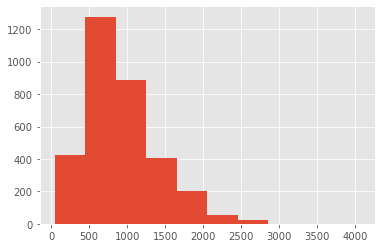

In [67]:
fig, ax = plt.subplots()
ax.hist(exos_mle_temp_clean['pl_eqt'])

In [68]:
#the equilibrium temps of all exoplanets appear to be normally distributed....what about "Earthy (<= 10 Earth masses)" planets?

In [69]:
exos_mle_temp_terrestrial = exos_relevant[['pl_name','pl_eqt','pl_bmasse']]
too_large = exos_mle_temp_terrestrial[(exos_mle_temp_terrestrial['pl_bmasse'] > 10)].index
temps_terrestrial = exos_mle_temp_terrestrial.drop(too_large, inplace=False)

len(temps_terrestrial)

2422

(array([137., 696., 705., 385., 138.,  74.,  24.,   8.,   2.,   1.]),
 array([  50. ,  363.6,  677.2,  990.8, 1304.4, 1618. , 1931.6, 2245.2,
        2558.8, 2872.4, 3186. ]),
 <BarContainer object of 10 artists>)

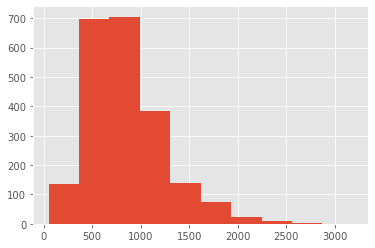

In [70]:
fig, ax = plt.subplots()
ax.hist(temps_terrestrial['pl_eqt'])

(array([3.079e+03, 1.203e+03, 1.330e+02, 3.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.296 ,  8.0006, 15.7052, 23.4098, 31.1144, 38.819 , 46.5236,
        54.2282, 61.9328, 69.6374, 77.342 ]),
 <BarContainer object of 10 artists>)

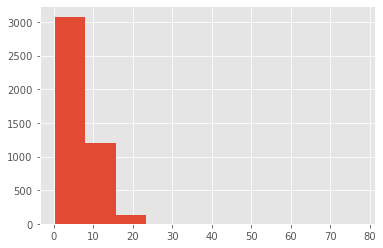

In [71]:
#pretty normal? I think?
#now radii!!

fig, ax = plt.subplots()
ax.hist(exos_mle_size['pl_rade'])

In [72]:
#I don't know what this distribution is - let me filter out planets that are too massive

too_massive = exos_mle_size[(exos_mle_size['pl_bmasse'] > 10)].index
sizes_terrestrial = exos_mle_size.drop(too_massive, inplace=False)

len(sizes_terrestrial)

2422

(array([9.920e+02, 1.332e+03, 6.300e+01, 7.000e+00, 4.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 1.000e+01, 6.000e+00]),
 array([ 0.296 ,  1.6774,  3.0588,  4.4402,  5.8216,  7.203 ,  8.5844,
         9.9658, 11.3472, 12.7286, 14.11  ]),
 <BarContainer object of 10 artists>)

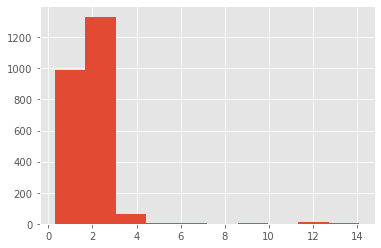

In [73]:
fig, ax = plt.subplots()
ax.hist(sizes_terrestrial['pl_rade'])

In [74]:
#i still don't really know what distribution this is, but it kindof looks normal...?

#let's try the distance stuff. a histogram will help ID the distribution of distances, but a scatter plot might be able to show me if more planets 
# lie closer to the galactic core than Earth, or farther.....

In [75]:
still_too_big = exos_mle_dist[(exos_mle_dist['pl_bmasse'] > 10)].index
dist_terrestrial = exos_mle_dist.drop(still_too_big, inplace=False)
len(dist_terrestrial)

2422

(array([274., 239., 202., 204., 209., 235., 389., 237., 212., 221.]),
 array([   0. ,  177.5,  355. ,  532.5,  710. ,  887.5, 1065. , 1242.5,
        1420. , 1597.5, 1775. ]),
 <BarContainer object of 10 artists>)

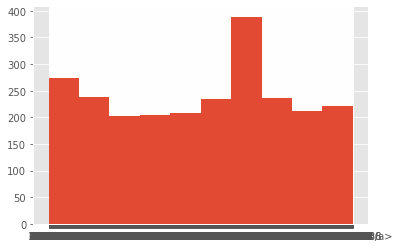

In [76]:
fig, ax = plt.subplots()
ax.hist(dist_terrestrial['sy_dist'])

In [77]:
dist_terrestrial.head()

,pl_name,hostname,ra,dec,sy_dist,pl_bmasse
29,55 Cnc e,55 Cnc,133.146837,28.329815,12.5855,7.99000
32,61 Vir b,61 Vir,199.596455,-18.315774,8.50332,5.10000
59,BD-06 1339 b,BD-06 1339,88.251181,-5.996338,20.2695,8.50000
89,CoRoT-24 b,CoRoT-24,101.922543,-3.719289,591.555,5.70000
102,CoRoT-7 b,CoRoT-7,100.956168,-1.063008,159.906,4.07661


In [62]:
#how do i convert 'decstr' and 'rastr' to decimal formats?

In [63]:
#moving on: discovery methods and controversy.

exos_relevant.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_rade,pl_bmasse,...,pl_eqt,st_spectype,st_teff,st_mass,st_rad,ra,dec,glon,glat,sy_dist
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,12.1,6165.6000,...,NaN,G8 III,4742.0,2.70,19.00,185.178779,17.793252,264.13775,78.28058,93.1846
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,12.3,4684.8142,...,NaN,K4 III,4213.0,2.78,29.79,229.274595,71.823943,108.71900,41.04437,125.321
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,12.9,1525.5000,...,NaN,K0 III,4813.0,2.20,11.00,352.824150,39.235837,106.41269,-21.05141,75.4392
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,12.9,1481.0878,...,NaN,K0 V,5338.0,0.90,0.93,242.602101,43.816362,69.16849,46.94447,17.9323
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,13.5,565.7374,...,NaN,G3 V,5750.0,1.08,1.13,295.465642,50.516824,83.33558,13.20446,21.1397


In [78]:
discovery = exos_relevant[['pl_name','discoverymethod','disc_facility','disc_year','pl_controv_flag']]
discovery.head()

,pl_name,discoverymethod,disc_facility,disc_year,pl_controv_flag
0,11 Com b,Radial Velocity,Xinglong Station,2007,0
1,11 UMi b,Radial Velocity,Thueringer Landessternwarte Tautenburg,2009,0
2,14 And b,Radial Velocity,Okayama Astrophysical Observatory,2008,0
3,14 Her b,Radial Velocity,W. M. Keck Observatory,2002,0
4,16 Cyg B b,Radial Velocity,Multiple Observatories,1996,0


In [65]:
discovery['discoverymethod'].value_counts()

Transit                          3349
Radial Velocity                   870
Microlensing                      108
Imaging                            53
Transit Timing Variations          21
Eclipse Timing Variations          16
Pulsar Timing                       7
Orbital Brightness Modulation       6
Pulsation Timing Variations         2
Disk Kinematics                     1
Astrometry                          1
Name: discoverymethod, dtype: int64

In [79]:
#okay, how controversial are discoveries by transit?

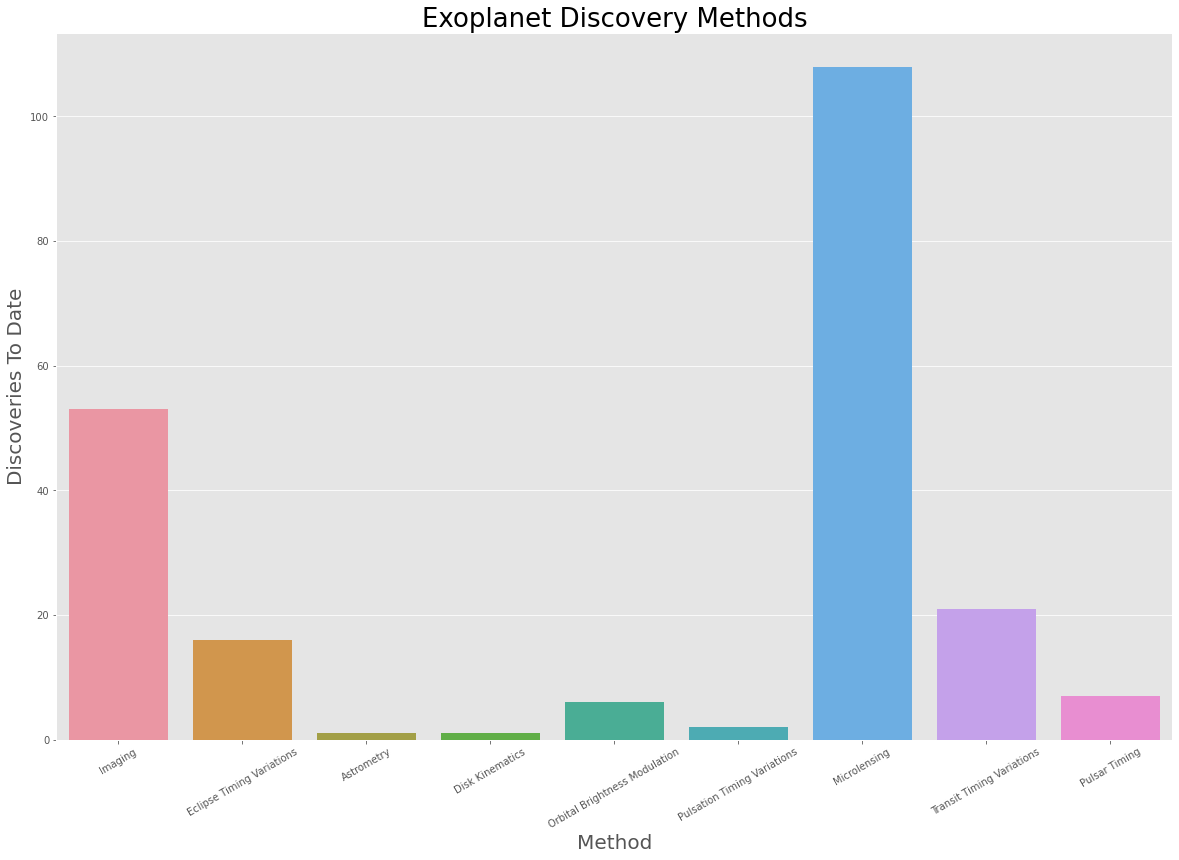

In [82]:
fig=plt.gcf()
fig.set_size_inches(20,13)

ax = sb.countplot(x = 'discoverymethod', data = discovery[(discovery['discoverymethod'] != 'Transit') & (discovery['discoverymethod'] != 'Radial Velocity')])

#specfiy axis labels
ax.set_xlabel(xlabel='Method', fontsize = 20)
ax.set_ylabel(ylabel='Discoveries To Date',fontsize = 20)
ax.set_title(label='Exoplanet Discovery Methods', fontsize=26)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

plt.savefig('images/discovery_methods_count_without_mains.png')

In [83]:
discovery.loc[discovery['discoverymethod'] == 'Transit', 'pl_controv_flag'].sum()

6

In [84]:
discovery.groupby('discoverymethod')['pl_controv_flag'].sum()

discoverymethod
Astrometry                       0
Disk Kinematics                  0
Eclipse Timing Variations        2
Imaging                          3
Microlensing                     0
Orbital Brightness Modulation    5
Pulsar Timing                    0
Pulsation Timing Variations      0
Radial Velocity                  8
Transit                          6
Transit Timing Variations        0
Name: pl_controv_flag, dtype: int64

In [85]:
discovery.loc[(discovery['discoverymethod'] == 'Pulsar Timing')]

,pl_name,discoverymethod,disc_facility,disc_year,pl_controv_flag
4051,PSR B0329+54 b,Pulsar Timing,Multiple Facilities,2017,0
4052,PSR B1257+12 b,Pulsar Timing,Arecibo Observatory,1994,0
4053,PSR B1257+12 c,Pulsar Timing,Arecibo Observatory,1992,0
4054,PSR B1257+12 d,Pulsar Timing,Arecibo Observatory,1992,0
4055,PSR B1620-26 b,Pulsar Timing,Hubble Space Telescope,2003,0
4056,PSR J1719-1438 b,Pulsar Timing,Parkes Observatory,2011,0
4057,PSR J2322-2650 b,Pulsar Timing,Parkes Observatory,2017,0


In [86]:
def discmethod_dfcreator(df, discmethod):
    '''Returns a dataframe consisting of the input discovery method and all the years it produced discoveries.'''
    
    new_df = df.loc[(df['discoverymethod'] == discmethod)]
    return new_df.groupby('disc_year').count().cumsum()


In [87]:
pulsar_timing = discmethod_dfcreator(discovery, 'Pulsar Timing')
radial_velocity = discmethod_dfcreator(discovery, 'Radial Velocity')
imaging = discmethod_dfcreator(discovery, 'Imaging')
etv = discmethod_dfcreator(discovery, 'Eclipse Timing Variations')
transit = discmethod_dfcreator(discovery, 'Transit')
astrometry = discmethod_dfcreator(discovery, 'Astrometry')
disk_kinematics = discmethod_dfcreator(discovery, 'Disk Kinematics')
obm = discmethod_dfcreator(discovery, 'Orbital Brightness Modulation')
ptv = discmethod_dfcreator(discovery, 'Pulsation Timing Variations')
microlensing = discmethod_dfcreator(discovery, 'Microlensing')
ttv = discmethod_dfcreator(discovery, 'Transit Timing Variations')

In [88]:
pulsar_timing.head(30)

,pl_name,discoverymethod,disc_facility,pl_controv_flag
disc_year,,,,
1992,2,2,2,2
1994,3,3,3,3
2003,4,4,4,4
2011,5,5,5,5
2017,7,7,7,7


In [89]:
pulsar_timing.groupby('disc_year').count().cumsum()

,pl_name,discoverymethod,disc_facility,pl_controv_flag
disc_year,,,,
1992,1,1,1,1
1994,2,2,2,2
2003,3,3,3,3
2011,4,4,4,4
2017,5,5,5,5


In [90]:
year_counts = discovery['disc_year'].value_counts()
year_counts

2016    1505
2014     872
2018     314
2020     227
2019     199
2015     157
2017     153
2012     139
2011     138
2013     125
2010      97
2009      95
2021      91
2008      66
2007      52
2005      36
2006      31
2002      29
2004      27
2003      22
2000      16
1999      13
2001      12
1998       6
1996       6
1992       2
1989       1
1997       1
1994       1
1995       1
Name: disc_year, dtype: int64

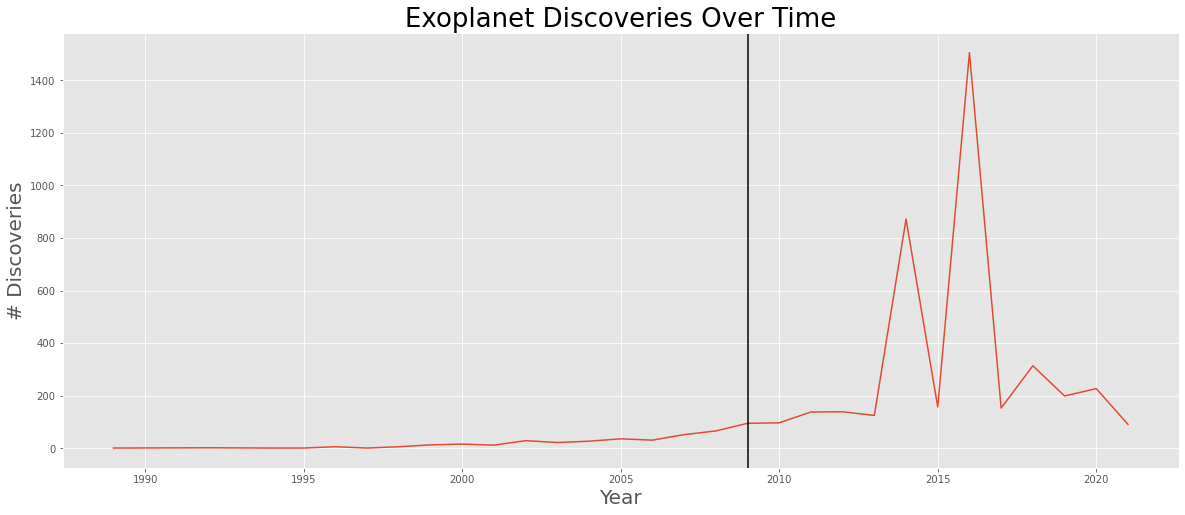

In [92]:
fig=plt.gcf()
fig.set_size_inches(20,8)

ax = sb.lineplot(data = year_counts)

#specfiy axis labels
ax.set_xlabel(xlabel='Year', fontsize = 20)
ax.set_ylabel(ylabel='# Discoveries',fontsize = 20)
ax.set_title(label='Exoplanet Discoveries Over Time', fontsize=26)
ax.axvline(2009, color='black')

#plt.savefig('images/discoveries_over_time.png')

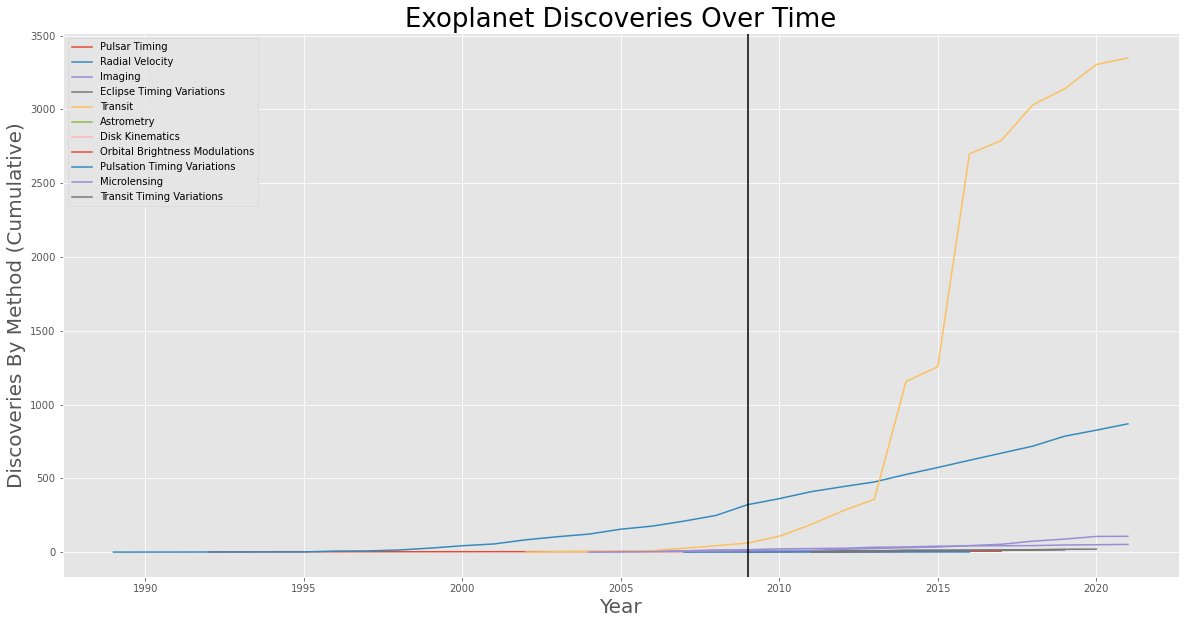

In [95]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)

ax1 = sb.lineplot(data = pulsar_timing['discoverymethod'])
ax2 = sb.lineplot(data = radial_velocity['discoverymethod'])
ax3 = sb.lineplot(data = imaging['discoverymethod'])
ax4 = sb.lineplot(data = etv['discoverymethod'])
ax5 = sb.lineplot(data = transit['discoverymethod'])
ax6 = sb.lineplot(data = astrometry['discoverymethod'])
ax7 = sb.lineplot(data = disk_kinematics['discoverymethod'])
ax8 = sb.lineplot(data = obm['discoverymethod'])
ax9 = sb.lineplot(data = ptv['discoverymethod'])
ax10 = sb.lineplot(data = microlensing['discoverymethod'])
ax11 = sb.lineplot(data = ttv['discoverymethod'])

#specfiy axis labels
ax.set_xlabel(xlabel='Year', fontsize = 20)
ax.set_ylabel(ylabel='Discoveries By Method (Cumulative)',fontsize = 20)
ax.set_title(label='Exoplanet Discoveries Over Time', fontsize=26)
ax.legend(labels=['Pulsar Timing','Radial Velocity','Imaging','Eclipse Timing Variations','Transit','Astrometry',
                  'Disk Kinematics','Orbital Brightness Modulations','Pulsation Timing Variations','Microlensing','Transit Timing Variations'])
ax.axvline(2009,color='black')

#plt.savefig('images/discoveries_over_time_by_method.png')

In [96]:
#sb.lineplot(x ='disc_year', y = discovery.groupby('discoverymethod')['disc_year'].sum(), hue='discoverymethod', data=discovery)

In [97]:
n = 25
prolific25_counts = discovery['disc_facility'].value_counts()[:n].tolist()
prolific25_names = discovery['disc_facility'].value_counts()[:n].index.tolist()

prolific_dict = dict(zip(prolific25_names,prolific25_counts))

prolific_facilities = pd.DataFrame(prolific_dict.items(), columns=['Discovering Facility', 'Discoveries To Date'])

prolific_facilities.head()

,Discovering Facility,Discoveries To Date
0,Kepler,2398
1,K2,426
2,La Silla Observatory,247
3,W. M. Keck Observatory,180
4,Multiple Observatories,178


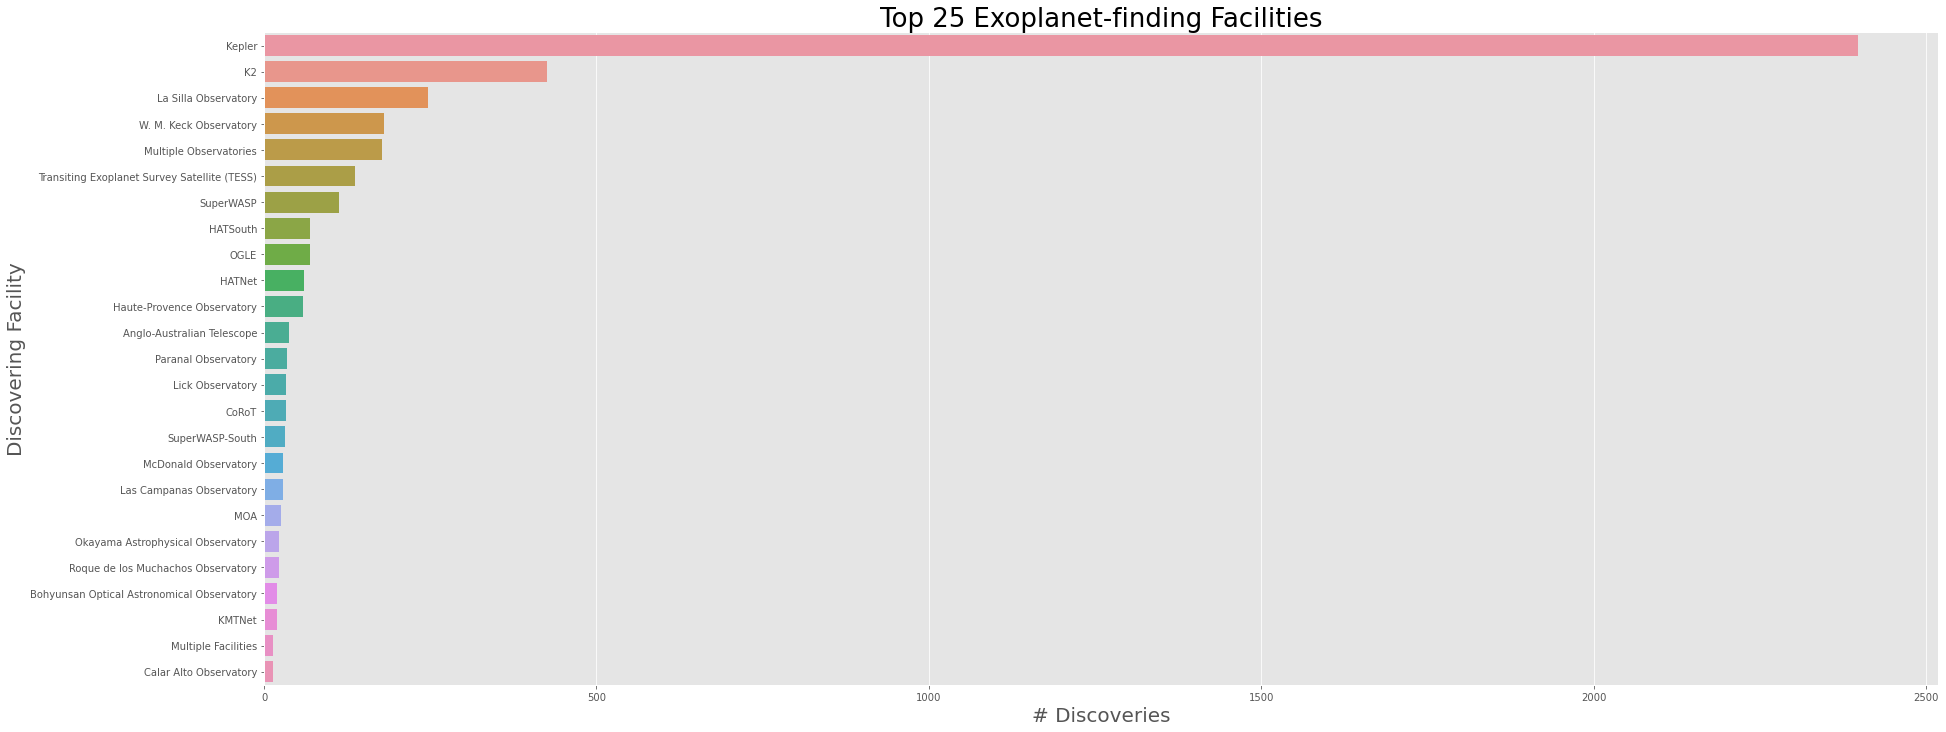

In [99]:
fig=plt.gcf()
fig.set_size_inches(30,12)

ax = sb.barplot(x = prolific_facilities['Discoveries To Date'], y = prolific_facilities['Discovering Facility'], data = prolific_facilities)

#specfiy axis labels
ax.set_xlabel(xlabel='# Discoveries', fontsize = 20)
ax.set_ylabel(ylabel='Discovering Facility',fontsize = 20)
ax.set_title(label='Top 25 Exoplanet-finding Facilities', fontsize=26)

plt.savefig('images/prolific_facilities.png')

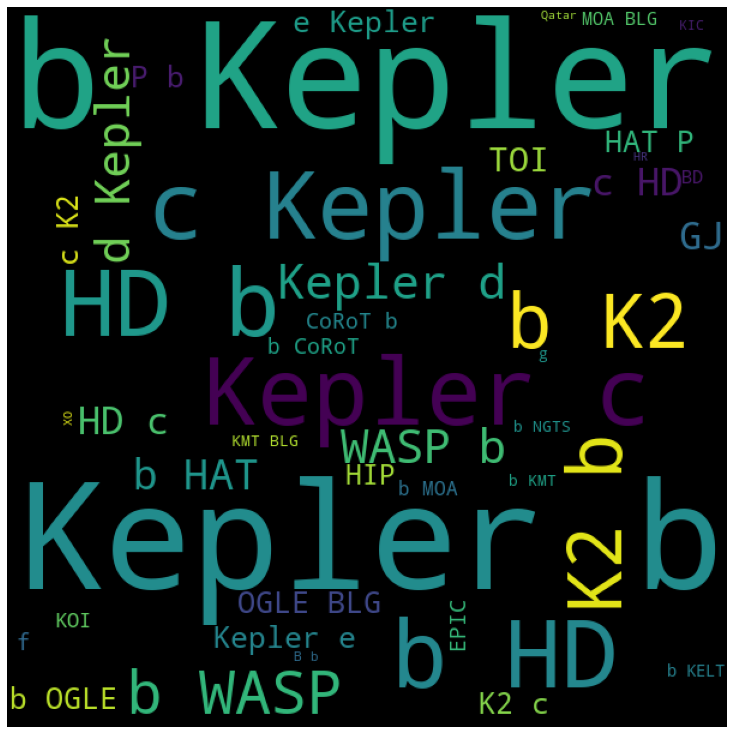

In [100]:
wordcloud = WordCloud(width = 600, height = 600, 
				background_color ='black',  
				min_font_size = 10).generate(' '.join(exos_relevant['pl_name'])) 

# plot the WordCloud image					 
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [101]:
#a wordcloud of common host star names that isn't as useful as i thought it would be

In [102]:
def bootstrap_planets(data, n_samples=10000):
    bootstrap_samples_mean = []
    
    for _ in range(n_samples):
        bootstrap = np.random.choice(data, size=len(data), replace=True)
        bootstrap_samples_mean.append(np.mean(boot))
        
    return bootstrap_samples_mean

In [103]:
#is it possible to design a hypothesis test that examines the "averageness" of the Earth? how would that be written? would it be based on one 
#metric (mass) or another (temperature)? can it be based on multiple?

#Heather's CI idea is awesome, leveraging the confidence interval of each metric to estimate where 
#the true average of a metric might lie, and then comparing Earth's data to that 

In [104]:
#Ho = Within the mass range for terrestrial planets, the mean is Earth's mean.
#Ha = Within the mass range for terrestrial planets, the mean differs from Earth's mean.

In [105]:
rocky_planets['pl_bmasse'][:10]

29     7.99000
32     5.10000
59     8.50000
89     5.70000
102    4.07661
103    8.40000
111    9.60000
112    3.35000
113    4.13000
115    2.58000
Name: pl_bmasse, dtype: float64

In [106]:
#first: assume the sample mean is equivalent to the population mean for our new (sample) distribution
#second: instead of using std dev for our sample distribution, we're using std err because we are applying the CLT, and we are creating a sample distribution

masses_mean = np.mean(rocky_planets['pl_bmasse'])
masses_std = np.std(rocky_planets['pl_bmasse'])

masses_std_err = masses_std/np.sqrt(len(rocky_planets['pl_bmasse']))

print(masses_mean)
print(masses_std_err)

4.580693166666665
0.0514299825174714


In [107]:
#creating the distribution

#plot this
normal_planets = stats.norm(masses_mean,masses_std_err)

#plot these as vertical lines and fill the space between
l_bound = normal_planets.ppf(0.025)
u_bound = normal_planets.ppf(0.975)

(l_bound,u_bound)
#then plot Earth and see how it compares

(4.479892253206896, 4.681494080126433)

In [108]:
type(normal_planets)

scipy.stats._distn_infrastructure.rv_frozen

Text(0.5, 1.0, '95% Confidence Interval of Average Terrestrial Exoplanet Mass')

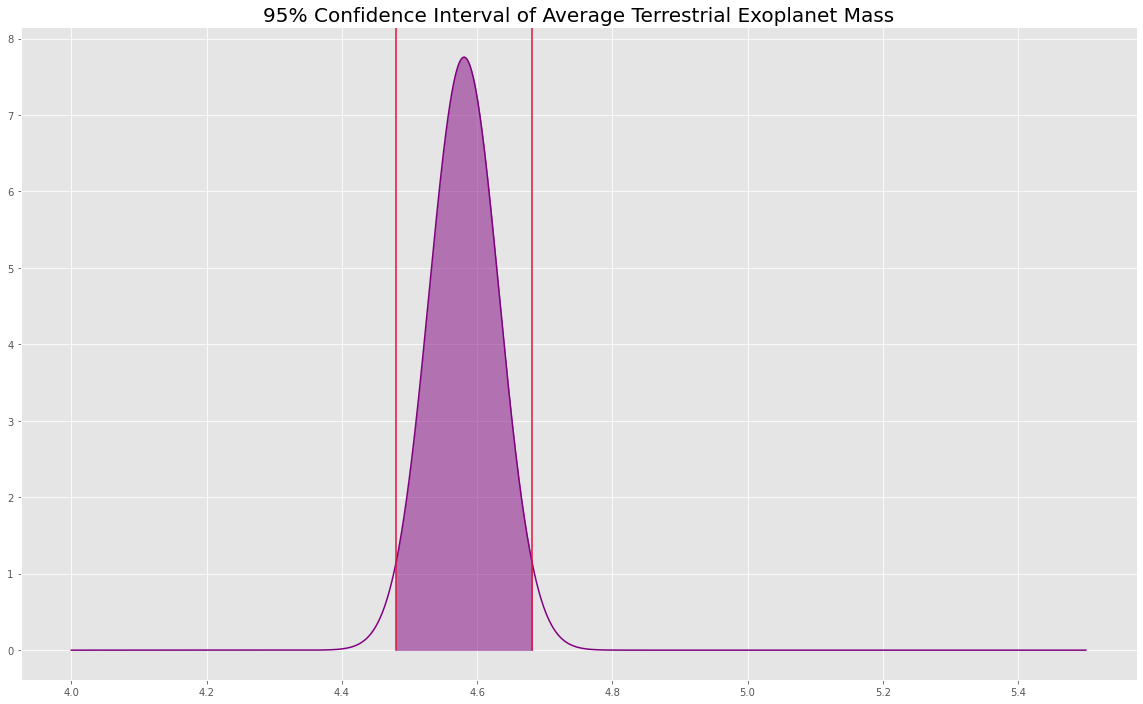

In [109]:
fig, ax = plt.subplots(1,figsize=(20,12))

x = np.linspace(4,5.5,4500)
ax.plot(x, normal_planets.pdf(x), color='purple')
ax.axvline(l_bound, ymin=0.045, color='crimson')
ax.axvline(u_bound, ymin=0.045, color='crimson')
ax.fill_between(x,normal_planets.pdf(x), where=((x>=l_bound)&(x<=u_bound)), color='purple', alpha=0.5)
#ax.axvline(1, color='teal')
ax.set_title(label='95% Confidence Interval of Average Terrestrial Exoplanet Mass', fontsize=20)

In [117]:
def metric_mean_distribution(data):
    #establish the metric
    metric = input('What metric are you seeking the mean of?').capitalize()
    ci = float(input('What confidence interval do you seek? Please enter a percentage between 0 and 1.'))
    #earth = float(input("What is Earth's mean value for this statistic?"))
    colour = input('What color shall this plot be?')
    
    l_bound = (1-ci)/2
    u_bound = 1-l_bound
    
    metric_mean = np.mean(data)
    metric_std = np.std(data)
    metric_std_err = metric_std/np.sqrt(len(data))
    
    #confirm the metric and display the mean and standard error
    print(f'For {metric}, the mean is {metric_mean} and the standard error is {metric_std_err}.')
    
    #create distribution and determine confidence interval
    normal_metric = stats.norm(metric_mean,metric_std_err)
    l_bound_ci = normal_metric.ppf(l_bound)
    u_bound_ci = normal_metric.ppf(u_bound)
    
    print('The lower bound of the ' + str(ci*100) + f'% confidence interval is {l_bound_ci} and the upper bound is {u_bound_ci}')
    
    #plot it
    fig, ax = plt.subplots(1,figsize=(20,12))

    x = np.linspace(l_bound_ci-(l_bound_ci/8),u_bound_ci+(u_bound_ci/8),4500)
    ax.plot(x, normal_metric.pdf(x), color=colour)
    ax.axvline(l_bound_ci, ymin=0.045, color='crimson')
    ax.axvline(u_bound_ci, ymin=0.045, color='crimson')
    ax.fill_between(x,normal_metric.pdf(x), where=((x>=l_bound_ci)&(x<=u_bound_ci)), color=colour, alpha=0.5)
    #ax.axvline(earth, color='teal')
    ax.set_title(label=(f'Average Exoplanet {metric} w/ '+str(ci*100)+'% CI'), fontsize=20)  

What metric are you seeking the mean of? Mass
What confidence interval do you seek? Please enter a percentage between 0 and 1. 0.95
What color shall this plot be? black


For Mass, the mean is 4.580693166666665 and the standard error is 0.0514299825174714.
The lower bound of the 95.0% confidence interval is 4.479892253206896 and the upper bound is 4.681494080126433


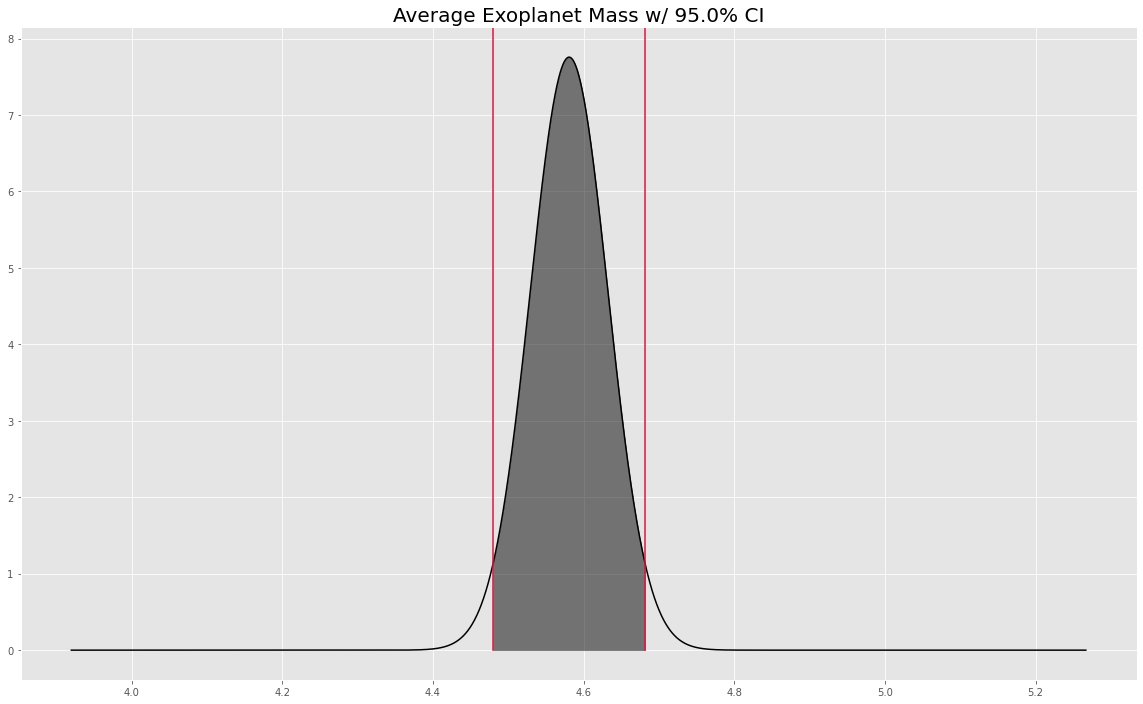

In [120]:
metric_mean_distribution(rocky_planets['pl_bmasse'])

What metric are you seeking the mean of? Temperature
What confidence interval do you seek? Please enter a percentage between 0 and 1. 0.95
What color shall this plot be? purple


For Temperature, the mean is 843.5188940092166 and the standard error is 7.913761602376466.
The lower bound of the 95.0% confidence interval is 828.0082062863228 and the upper bound is 859.0295817321105


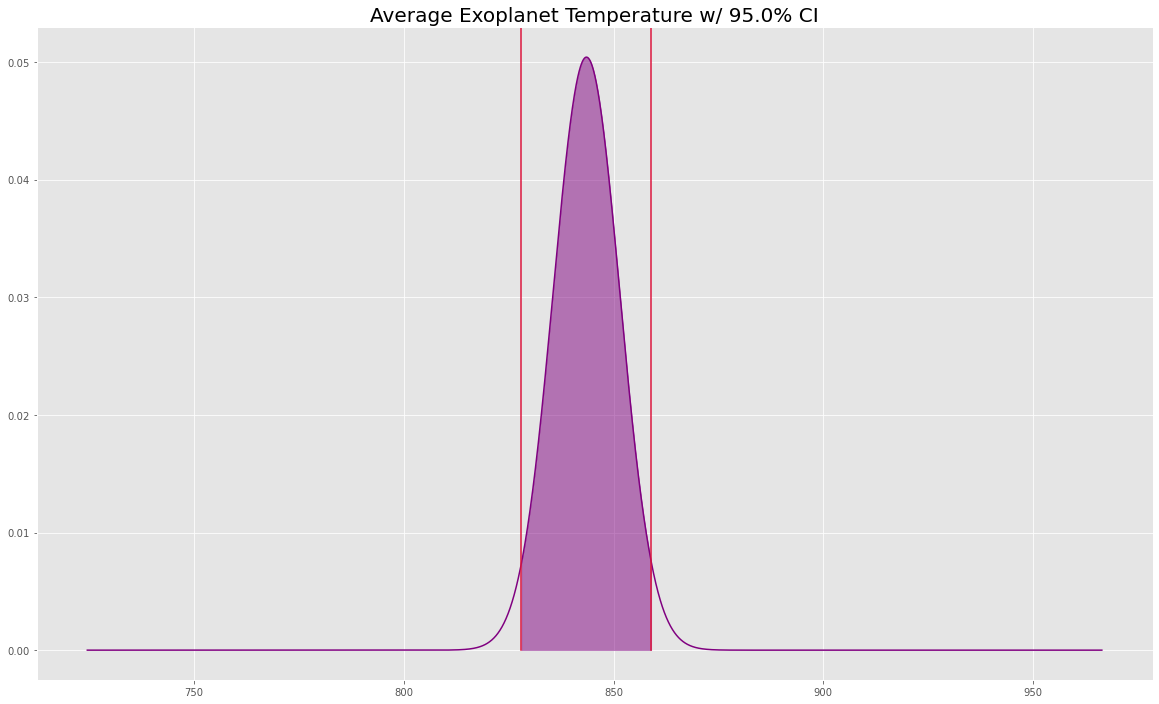

In [119]:
metric_mean_distribution(rocky_planets['pl_eqt'])

What metric are you seeking the mean of? Size
What confidence interval do you seek? Please enter a percentage between 0 and 1. 0.95
What color shall this plot be? orange


For Size, the mean is 2.007705419942081 and the standard error is 0.02340982741514817.
The lower bound of the 95.0% confidence interval is 1.9618230013240925 and the upper bound is 2.05358783856007


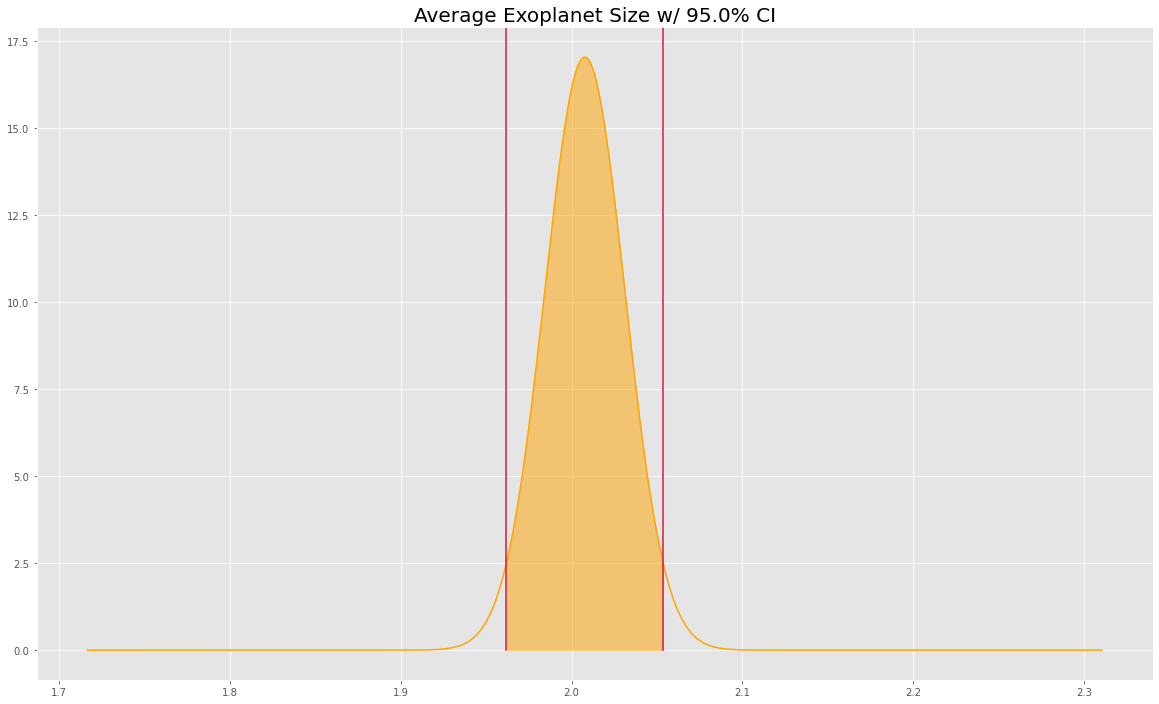

In [121]:
metric_mean_distribution(rocky_planets['pl_rade'])

What metric are you seeking the mean of? Year
What confidence interval do you seek? Please enter a percentage between 0 and 1. .80
What color shall this plot be? blue


For Year, the mean is 3930.5214892961512 and the standard error is 2489.438972549238.
The lower bound of the 80.0% confidence interval is 740.1770766979339 and the upper bound is 7120.865901894369


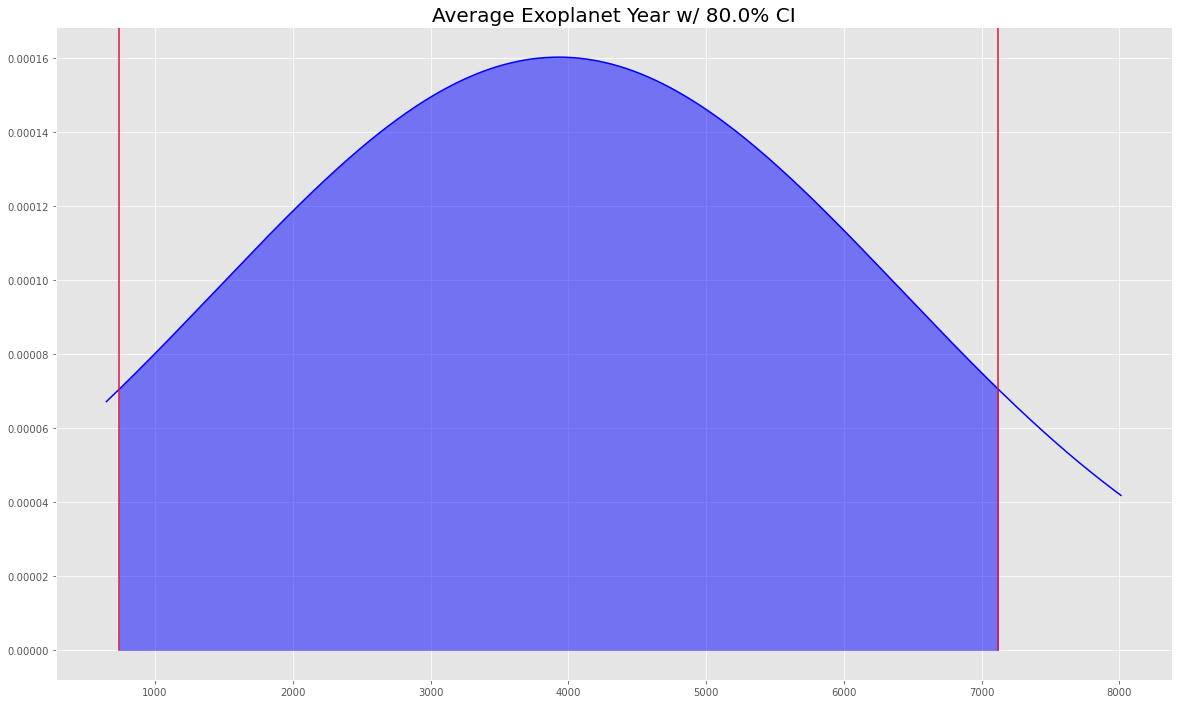

In [123]:
metric_mean_distribution(exos['pl_orbper'])

What metric are you seeking the mean of? Eccentricity
What confidence interval do you seek? Please enter a percentage between 0 and 1. 0.87
What color shall this plot be? green


For Eccentricity, the mean is 0.0694821189873418 and the standard error is 0.0021678225094054603.
The lower bound of the 87.0% confidence interval is 0.06619981483382742 and the upper bound is 0.07276442314085618


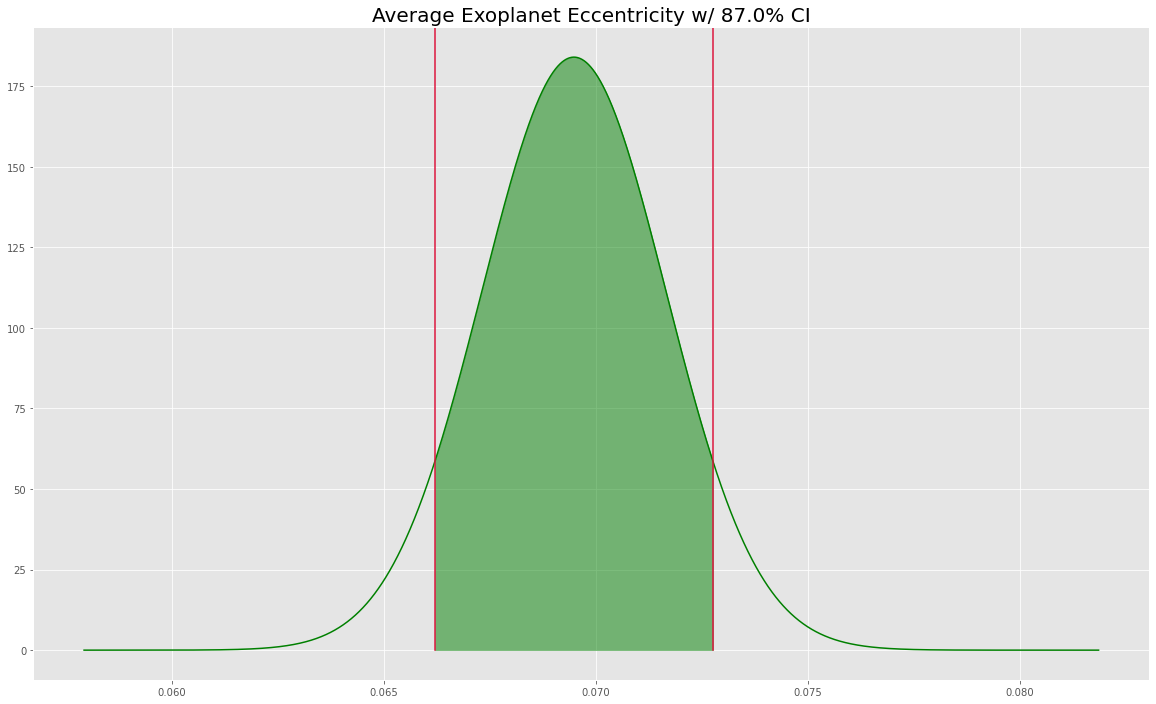

In [124]:
metric_mean_distribution(exos['pl_orbeccen'])

In [126]:
rocky_planets[(rocky_planets['pl_eqt'] >= 273.15) & (rocky_planets['pl_eqt'] <= 373.15)]

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_rade,pl_bmasse,...,pl_eqt,st_spectype,st_teff,st_mass,st_rad,ra,dec,glon,glat,sy_dist
139,EPIC 212737443 c,EPIC 212737443,1,2,Transit,2019,K2,0,2.690,7.70,...,316.0,K3,4684.0,0.69,0.67,204.221507,-7.318058,322.27085,53.83847,336.25
156,GJ 1132 c,GJ 1132,1,2,Radial Velocity,2018,La Silla Observatory,0,1.430,2.64,...,300.0,M4.5 V,3270.0,0.18,0.21,153.709070,-47.154936,277.25461,7.75911,12.613
177,GJ 251 b,GJ 251,1,1,Radial Velocity,2020,W. M. Keck Observatory,0,1.830,4.00,...,351.0,M3.0 V,3451.0,0.36,0.36,103.700250,33.266463,182.93672,15.13189,5.58057
199,GJ 3473 c,GJ 3473,2,2,Radial Velocity,2020,Multiple Observatories,0,2.630,7.41,...,329.0,M4,3347.0,0.36,0.36,120.593606,3.337163,218.15071,17.28798,27.3644
210,GJ 411 b,GJ 411,1,2,Radial Velocity,2019,Haute-Provence Observatory,0,1.450,2.69,...,370.0,M1.5 V,3601.0,0.39,0.39,165.834471,35.972317,185.11257,65.43126,5.675773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4095,TOI-1266 c,TOI-1266,1,2,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),0,1.560,2.20,...,344.0,M3,3600.0,0.45,0.42,197.996583,65.833697,119.58108,51.16066,36.0118
4128,TOI-270 d,TOI-270,1,3,Transit,2019,Transiting Exoplanet Survey Satellite (TESS),0,2.130,5.18,...,340.0,M3.0 V,3386.0,0.40,0.38,68.416080,-51.957394,259.77379,-42.01396,22.4793
4148,TOI-700 c,TOI-700,1,3,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),0,2.650,7.51,...,356.0,M2 V,3461.0,0.41,0.42,97.095717,-65.578615,275.46822,-26.88106,31.1265
4164,TRAPPIST-1 c,TRAPPIST-1,1,7,Transit,2016,La Silla Observatory,0,1.056,1.38,...,342.0,NaN,2559.0,0.08,0.12,346.626392,-5.043462,69.71519,-56.64891,12.4298888


In [ ]:
#a lamba function from Kevin... df['m_year'].apply(lambda x: x-100 if x>2021 else x ) 